# Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

we have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

 # IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# LOADING THE DATASET

In [3]:
df=pd.read_csv('loan_status.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Top 5 heads of the dataframe.

In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Bottom of the dataset.

In [5]:
df.shape

(614, 13)

We have 614 rows and 13 columns in the dataframe.

# CHECKING NULL VALUES IN THE DATAFRAME

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There is null values in the some of the columns.

<AxesSubplot:>

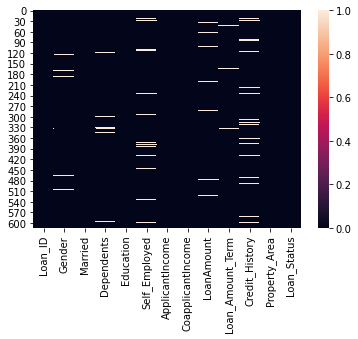

In [7]:
# checking null values through heatmap
sns.heatmap(df.isnull())

Heatmap is showing the presence of null values. 

# CHECKING DATATYPES OF THE COLUMNS

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We have 4 float type of columns, 1 integer type column and 8 object type columns.

# REPLACING NULL VALUES

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# filling misssing values for numerical columns
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())


In [11]:
# filling missing values of categorical columns
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
# Checcking nul values again
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now there is No Null values.

# EXPLORATORY DATA ANALYSIS for nominal data

Male      502
Female    112
Name: Gender, dtype: int64


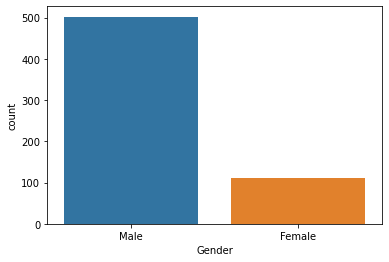

In [13]:
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

Male applicant is more that female applicants and 502 applicants are male and 112 applicants are female.

Yes    401
No     213
Name: Married, dtype: int64


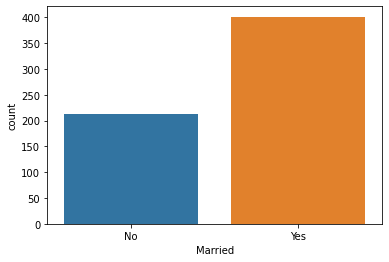

In [14]:
ax=sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

Most of the applicants are married.
Married applicants are 401 and Non-Married applicants are 213.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


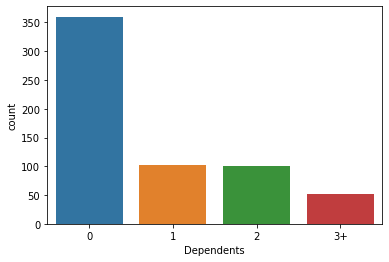

In [15]:
ax=sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

Most of the applicants dont have any dependents and very few applicants with 3+ dependents.
Applicants with 1 or 2 dependents are almost equal in numbers.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


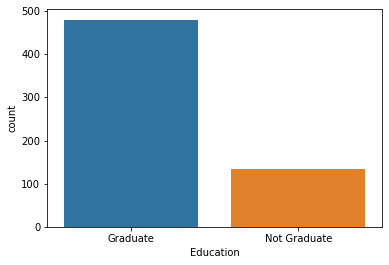

In [16]:
ax=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

480 apllicants are graduate and maximum in numbers , 134 applicants are not-graduate.

No     532
Yes     82
Name: Self_Employed, dtype: int64


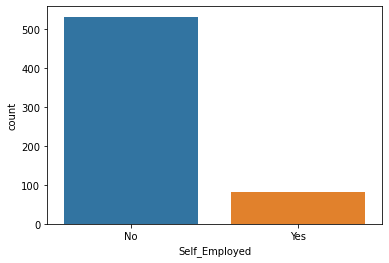

In [17]:
ax=sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'].value_counts())

532 applicants are not self employed and maximum in numbers and 82 applicants are self employed.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


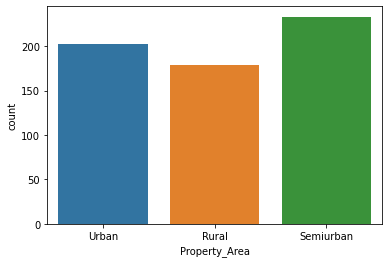

In [18]:
ax=sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'].value_counts())

233 are the semiurban and maximum in numbers , 202 are Urban and 179 are Rural.
There is not much differnce between Semiurban ,Urban and Rural.

Y    422
N    192
Name: Loan_Status, dtype: int64


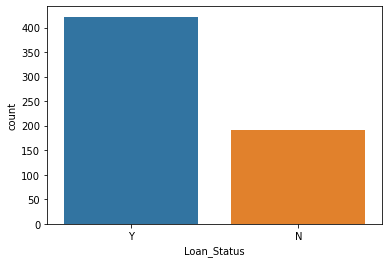

In [19]:
ax=sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())

422 Loan application has been approved and 192 loan apllication has not been approved.

# EXPLORATORY DATA ANALYSIS for numerical data

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

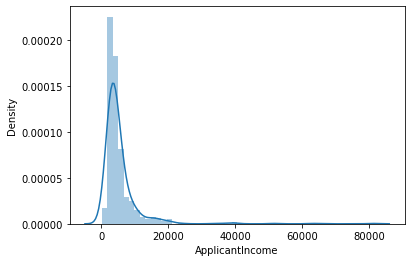

In [20]:
sns.distplot(df['ApplicantIncome'])

Most of the Applicant Income ranges from 0 to 20000 and it is left skewed.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

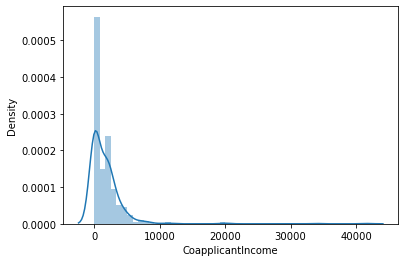

In [21]:
sns.distplot(df['CoapplicantIncome'])

 Most of the CoapplicantIncome ranges from 0 to 10000 and it is left skewed.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

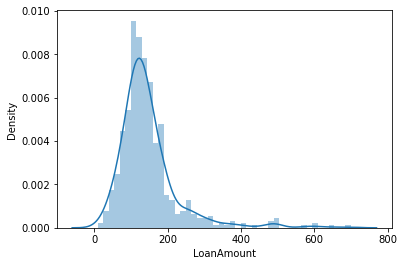

In [22]:
sns.distplot(df['LoanAmount'])

Most of the Loan Amount Ranges from 0 to 200 and few Loan amount ranges from 200 to 400 ,400 to 600 and 600 to 800.
and it is left skewed .

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

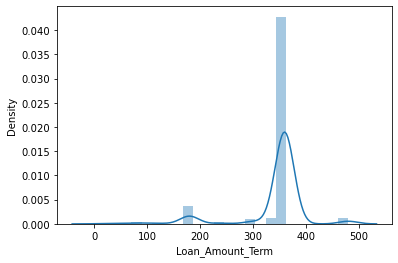

In [23]:
sns.distplot(df['Loan_Amount_Term'])

Most of the Loan amount term ranges from 300 to 400 and it is right skewed.

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

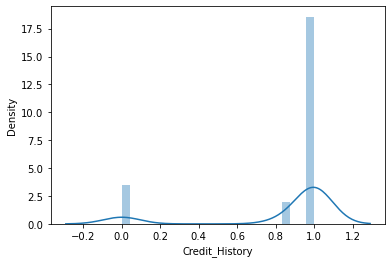

In [24]:
sns.distplot(df['Credit_History'])

Most of the Credit History of the applicants ranges from 0.6 to 1.2 and it is right skewed.

# CHECKING OUTLIERS

ApplicantIncome         AxesSubplot(0.125,0.71587;0.0945122x0.16413)
CoapplicantIncome    AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
LoanAmount           AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Loan_Amount_Term     AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Credit_History       AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
dtype: object

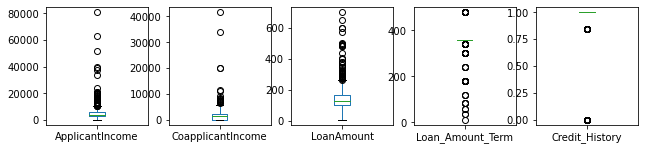

In [25]:
df.plot(kind='box', subplots=True ,layout=(4,7),figsize=(15,10))

Outliers are present in 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term ' and 'Credit_History'columns.

# CHECKING SKEWNESS


In [26]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

skewed columns are:
    
    ApplicantIncome
    
    CoapplicantIncome    
    
    LoanAmount
    
    Loan_Amount_Term
    
    Credit_History
    
    
    Skewness is present in nominal columns also but we cant treat skewness in nominal columns.
    

# ENCODING THE DATAFRAME TO CONVERT STRING COLUMNS TO NUMERIC COLUMNS

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
enc=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i])

In [29]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


Now all the object type columns has been converted into numeric columns.

# OUTLIER REMOVAL

In [30]:
df.shape

(614, 13)

In [31]:
from scipy.stats import zscore


In [32]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
        8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
       dtype=int64))

In [33]:
df_=df[(z<3).all(axis=1)]
df_

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [34]:
df.shape

(614, 13)

In [35]:
df_.shape

(577, 13)

37 rows has been removed as a outliers.

In [36]:
df_.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# REMOVING SKEWNESS

In [37]:
df_.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [38]:
data=df_

In [39]:
data['ApplicantIncome']=np.log(df_['ApplicantIncome'])
data['LoanAmount']=np.log(df_['LoanAmount'])
data['Credit_History']=np.cbrt(df_['Credit_History'])
data['Loan_Amount_Term']=np.cbrt(df_['Loan_Amount_Term'])

In [40]:
data.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.207967
CoapplicantIncome    1.350517
LoanAmount          -0.740616
Loan_Amount_Term    -2.557136
Credit_History      -1.968907
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [41]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

 most of the skewness has been removed tried removing more skewness but loosing the data.

# STATISTICAL SUMMARY

In [42]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,304.077990,0.814558,0.649913,0.719237,0.227036,0.126516,8.291904,1420.807487,4.827555,7.008992,0.846614,1.031196,0.689775
std,176.726275,0.388993,0.477411,0.995229,0.419280,0.332719,0.555244,1651.545352,0.429886,0.405462,0.354936,0.789953,0.462987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.010635,0.000000,2.197225,5.646216,0.000000,0.000000,0.000000
25%,151.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.949091,0.000000,4.605170,7.113787,1.000000,0.000000,0.000000
50%,303.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.229511,1255.000000,4.852030,7.113787,1.000000,1.000000,1.000000
75%,456.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.618305,2253.000000,5.075174,7.113787,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,9.936294,8980.000000,5.940171,7.829735,1.000000,2.000000,1.000000


<AxesSubplot:>

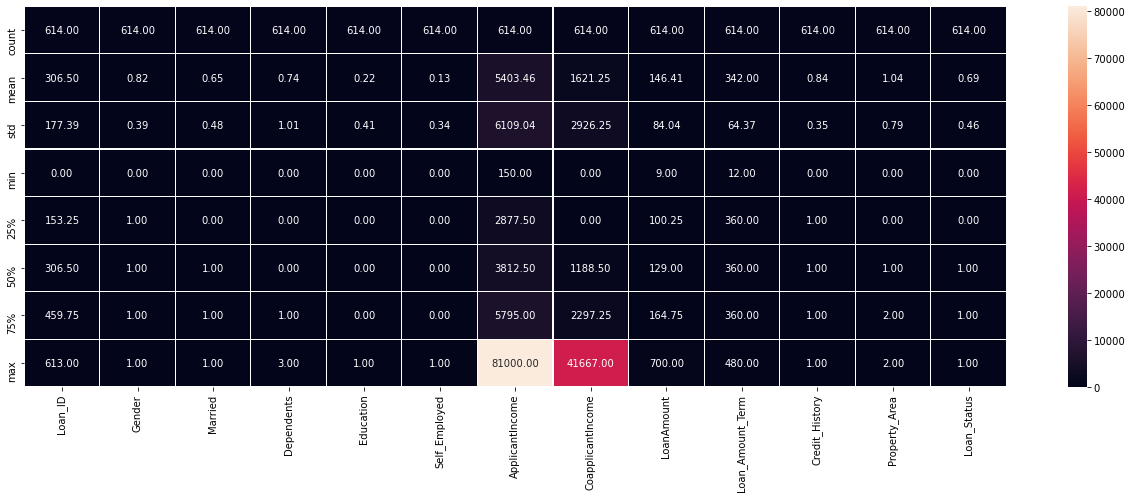

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths =0.1,fmt='0.2f')

Count is same in the every column.

There is not much difference between mean and median in any of the columns.

There is not much difference between 75th percentile and maximum in the columns.

# CORRELATION MATRIX

In [44]:
cor=df.corr()
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


<AxesSubplot:>

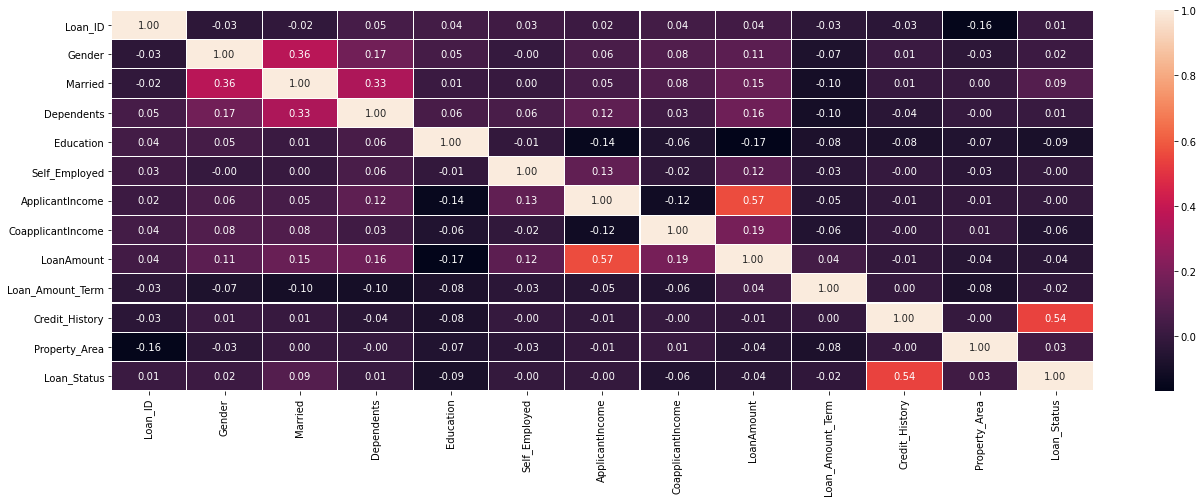

In [45]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths =0.1,fmt='0.2f')

Loan Status is somehow positively correlated with Loan_Amount_Term.

Loan Status is negatively correlated with Education.

Loan Amount is positively correlated with Applicant Income.

Loan Amount is negatively correlated with Education.

# DROPPING UNNECESSARY COLUMNS


In [46]:
# dropping Loan_Id because not required
data.drop('Loan_ID',inplace=True,axis=1)

In [47]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.0,4.986426,7.113787,1.0,2,1
1,1,1,1,0,0,8.430109,1508.0,4.852030,7.113787,1.0,0,0
2,1,1,0,0,1,8.006368,0.0,4.189655,7.113787,1.0,2,1
3,1,1,0,1,0,7.856707,2358.0,4.787492,7.113787,1.0,2,1
4,1,0,0,0,0,8.699515,0.0,4.948760,7.113787,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,0.0,4.262680,7.113787,1.0,0,1
610,1,1,3,0,0,8.320205,0.0,3.688879,5.646216,1.0,0,1
611,1,1,1,0,0,8.996157,240.0,5.533389,7.113787,1.0,2,1
612,1,1,2,0,0,8.933664,0.0,5.231109,7.113787,1.0,2,1


# SEPRATING THE COLUMNS INTO X AND Y

In [48]:
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [49]:
x.shape

(577, 11)

In [50]:
y.shape

(577,)

# HANDLING CLASS IMBALANCE PROBLEM BY OVERSAMPLING THE MINORITY CLASS


In [51]:
# In Target column Differece is more between yes and no
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(x,y)


In [52]:
y_over.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

Now no more difference between 0 and 1.

# TRAIN TEST SPLIT

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.22, random_state=47)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(450, 11)
(127, 11)
(450,)
(127,)


# MODEL BUILDING

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [55]:
#LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    
    

0.8031496062992126
[[23 24]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.96      0.49      0.65        47
           1       0.77      0.99      0.86        80

    accuracy                           0.80       127
   macro avg       0.86      0.74      0.76       127
weighted avg       0.84      0.80      0.78       127



In [56]:
# Logistic Regression Cross Validation

scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.8180809595202397


Accuracy score is 80% and cv score is 81% of Logistic Reression.

In [57]:
# AUC ROC CURVE Logistic Regression
lr.fit(x_train,y_train)
y_pred_proba=lr.predict_proba(x_test)[:,1]

In [58]:
y_pred_proba

array([0.12249817, 0.82679664, 0.87867704, 0.09363404, 0.11490353,
       0.74488   , 0.82139849, 0.82557839, 0.86090012, 0.71548692,
       0.76138193, 0.85552045, 0.65051164, 0.822793  , 0.83152098,
       0.50903156, 0.83151941, 0.77553337, 0.66077722, 0.07581691,
       0.7808892 , 0.84378014, 0.74428905, 0.82363376, 0.77784598,
       0.75752944, 0.7785776 , 0.84439872, 0.78320483, 0.82158072,
       0.12698843, 0.10821179, 0.1170488 , 0.88414309, 0.09737328,
       0.18750632, 0.71023731, 0.76145751, 0.10401611, 0.72296579,
       0.87098222, 0.80137467, 0.8165652 , 0.08946266, 0.8275785 ,
       0.69302453, 0.78851893, 0.72562565, 0.83580267, 0.66723284,
       0.73596719, 0.86860808, 0.76242658, 0.80597648, 0.78496804,
       0.82555757, 0.67846629, 0.07948924, 0.86851844, 0.78540657,
       0.81313168, 0.86142433, 0.81736925, 0.79521324, 0.74383675,
       0.81262686, 0.8317481 , 0.84482737, 0.10552962, 0.83404726,
       0.78663941, 0.75274306, 0.0499958 , 0.86616236, 0.69757

In [59]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
fpr
tpr

array([0.    , 0.0125, 0.0375, 0.0375, 0.075 , 0.075 , 0.0875, 0.0875,
       0.15  , 0.15  , 0.2375, 0.2375, 0.25  , 0.25  , 0.4   , 0.4   ,
       0.4625, 0.4625, 0.5875, 0.5875, 0.7125, 0.7125, 0.725 , 0.725 ,
       0.7625, 0.7625, 0.775 , 0.775 , 0.825 , 0.825 , 0.8625, 0.8625,
       0.875 , 0.875 , 0.925 , 0.925 , 0.9875, 0.9875, 1.    , 1.    ])

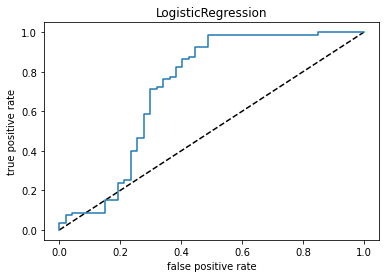

In [60]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('LogisticRegression')
plt.show()

In [61]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.7384308510638298


Auc_score of Logistic Regression is 73%.

In [62]:
# AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


0.7716535433070866
[[24 23]
 [ 6 74]]
              precision    recall  f1-score   support

           0       0.80      0.51      0.62        47
           1       0.76      0.93      0.84        80

    accuracy                           0.77       127
   macro avg       0.78      0.72      0.73       127
weighted avg       0.78      0.77      0.76       127



In [63]:
#For AdaBoostClassifier cross validation
scr=cross_val_score(ad,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7938380809595202


Accuracy score is 77% and cv score is 79% of adaboost classifier.

In [64]:
# AUC ROC CURVE adaboost classifier
ad.fit(x_train,y_train)
y_pred_prob=ad.predict_proba(x_test)[:,1]


In [65]:
y_pred_prob

array([0.48918037, 0.50950164, 0.50838621, 0.47425575, 0.49236215,
       0.50338797, 0.5072591 , 0.44067404, 0.51268428, 0.49172115,
       0.51940302, 0.51485525, 0.49921361, 0.51317264, 0.51317264,
       0.49855537, 0.51450579, 0.50725978, 0.50493172, 0.48593842,
       0.51145787, 0.50416899, 0.50152577, 0.50893507, 0.50111145,
       0.51440253, 0.51335704, 0.51488805, 0.50272921, 0.50472471,
       0.48379488, 0.48636885, 0.48918037, 0.50795521, 0.49078796,
       0.48957813, 0.50692803, 0.51081015, 0.4771092 , 0.50467208,
       0.50585893, 0.51165044, 0.50847111, 0.58788489, 0.51159833,
       0.50447998, 0.51135484, 0.50715842, 0.51636627, 0.50212723,
       0.50448405, 0.6129405 , 0.51099866, 0.50258878, 0.50656566,
       0.50841498, 0.51084084, 0.47660956, 0.51410556, 0.50450502,
       0.51380603, 0.51268428, 0.51326769, 0.51745334, 0.50637668,
       0.50712886, 0.51615996, 0.51172327, 0.49074437, 0.51639905,
       0.50954945, 0.50001166, 0.47319769, 0.51166108, 0.50126

In [66]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.    , 0.    , 0.0125, 0.0125, 0.025 , 0.025 , 0.0375, 0.0375,
       0.0875, 0.0875, 0.1125, 0.1125, 0.1625, 0.2125, 0.225 , 0.25  ,
       0.25  , 0.25  , 0.275 , 0.2875, 0.2875, 0.3   , 0.3   , 0.3125,
       0.3125, 0.3375, 0.3625, 0.3875, 0.4125, 0.4625, 0.4625, 0.475 ,
       0.5   , 0.5125, 0.5125, 0.5375, 0.6125, 0.6125, 0.6375, 0.6625,
       0.8   , 0.8   , 0.8125, 0.8125, 0.9125, 0.9125, 0.9375, 0.9375,
       0.95  , 0.95  , 0.9625, 0.9625, 0.975 , 0.975 , 0.975 , 0.975 ,
       1.    ])

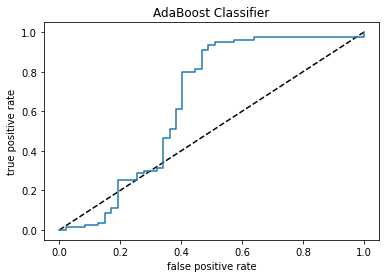

In [67]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifeir')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [68]:
auc_score=roc_auc_score(y_test,ad.predict(x_test))
print(auc_score)

0.7178191489361703


Auc_score of Adaboost Classifier is 71%

In [69]:
# RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7952755905511811
[[25 22]
 [ 4 76]]
              precision    recall  f1-score   support

           0       0.86      0.53      0.66        47
           1       0.78      0.95      0.85        80

    accuracy                           0.80       127
   macro avg       0.82      0.74      0.76       127
weighted avg       0.81      0.80      0.78       127



In [70]:
# Random FOrest Cross Validation

scr=cross_val_score(rf,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.8180809595202397


Accuracy score is 78% and cv score is 81% of Random Forest Classifier.

In [71]:
# AUC ROC CURVE RANDOM FOREST CLASSIFIER
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]


In [72]:
y_pred_prob

array([0.21, 0.72, 0.88, 0.12, 0.23, 0.76, 0.76, 0.37, 0.96, 0.38, 0.56,
       0.85, 0.78, 0.98, 0.91, 0.64, 0.94, 0.73, 0.74, 0.17, 0.82, 0.85,
       0.83, 0.89, 0.75, 0.98, 0.86, 0.9 , 0.75, 0.7 , 0.08, 0.16, 0.25,
       0.85, 0.08, 0.23, 0.83, 0.92, 0.02, 0.77, 0.87, 0.91, 0.78, 0.26,
       0.94, 0.64, 0.92, 0.83, 0.91, 0.69, 0.77, 0.85, 0.81, 0.72, 0.83,
       0.94, 0.76, 0.05, 0.8 , 0.89, 0.98, 0.98, 0.95, 0.56, 0.78, 0.8 ,
       0.8 , 0.87, 0.09, 0.99, 0.89, 0.83, 0.17, 0.91, 0.28, 0.86, 0.91,
       0.81, 0.51, 0.97, 0.59, 0.63, 0.86, 0.86, 0.64, 0.25, 0.57, 0.89,
       0.89, 0.9 , 0.73, 0.96, 0.93, 0.86, 0.9 , 0.91, 0.52, 0.54, 0.83,
       0.87, 0.11, 0.87, 0.11, 0.3 , 0.09, 0.96, 0.06, 0.67, 0.93, 0.84,
       0.75, 0.88, 0.87, 0.62, 0.93, 0.18, 0.92, 0.99, 0.07, 0.88, 0.81,
       0.75, 0.23, 0.9 , 0.21, 0.66, 0.65])

In [73]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.    , 0.025 , 0.0625, 0.075 , 0.1   , 0.1125, 0.1375, 0.2125,
       0.275 , 0.3125, 0.3625, 0.3875, 0.4375, 0.5   , 0.525 , 0.5375,
       0.6   , 0.6   , 0.625 , 0.7   , 0.725 , 0.75  , 0.7875, 0.8   ,
       0.85  , 0.875 , 0.875 , 0.9   , 0.9125, 0.9375, 0.9375, 0.9375,
       0.9375, 0.975 , 0.975 , 0.9875, 0.9875, 0.9875, 0.9875, 0.9875,
       0.9875, 0.9875, 0.9875, 0.9875, 1.    , 1.    ])

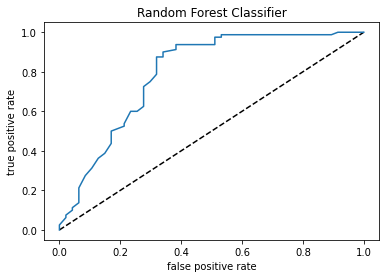

In [74]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifeir')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [75]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print(auc_score)

0.7196808510638297


Auc_score of Random Forest Classifier is 71%.

In [76]:
#DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7165354330708661
[[25 22]
 [14 66]]
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        47
           1       0.75      0.82      0.79        80

    accuracy                           0.72       127
   macro avg       0.70      0.68      0.68       127
weighted avg       0.71      0.72      0.71       127



In [77]:
# For DecisionTreeClassifier cross validation
scr=cross_val_score(dt,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7088755622188906


Accuracy score is 73% and cross validation score is 71% for Decision Tree classifier.

In [78]:
# AUC ROC CURVE DECISION TREE CLASSIFIER
dt.fit(x_train,y_train)
y_pred_prob=dt.predict_proba(x_test)[:,1]


In [79]:
y_pred_prob

array([0.23, 0.74, 0.79, 0.19, 0.24, 0.69, 0.68, 0.52, 0.92, 0.43, 0.59,
       0.78, 0.71, 0.99, 0.87, 0.73, 0.88, 0.74, 0.71, 0.14, 0.86, 0.86,
       0.8 , 0.93, 0.68, 0.97, 0.92, 0.9 , 0.77, 0.75, 0.02, 0.15, 0.24,
       0.81, 0.1 , 0.17, 0.79, 0.86, 0.  , 0.79, 0.91, 0.82, 0.81, 0.25,
       0.97, 0.67, 0.84, 0.8 , 0.89, 0.57, 0.76, 0.88, 0.83, 0.85, 0.91,
       0.95, 0.74, 0.05, 0.82, 0.83, 0.92, 0.94, 0.96, 0.61, 0.7 , 0.78,
       0.75, 0.86, 0.11, 0.96, 0.86, 0.78, 0.28, 0.89, 0.37, 0.9 , 0.87,
       0.87, 0.61, 0.97, 0.53, 0.61, 0.92, 0.87, 0.64, 0.18, 0.53, 0.91,
       0.88, 0.94, 0.8 , 0.98, 0.87, 0.88, 0.91, 0.92, 0.53, 0.46, 0.85,
       0.82, 0.16, 0.86, 0.08, 0.18, 0.09, 0.8 , 0.07, 0.63, 0.92, 0.79,
       0.83, 0.83, 0.94, 0.63, 0.92, 0.18, 0.91, 0.97, 0.17, 0.83, 0.8 ,
       0.8 , 0.32, 0.88, 0.21, 0.66, 0.7 ])

In [80]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.    , 0.0125, 0.025 , 0.0625, 0.0875, 0.1   , 0.125 , 0.1375,
       0.2125, 0.275 , 0.3   , 0.3375, 0.4   , 0.4375, 0.4625, 0.475 ,
       0.525 , 0.5625, 0.5875, 0.6375, 0.675 , 0.7125, 0.7375, 0.7625,
       0.8   , 0.8   , 0.85  , 0.85  , 0.875 , 0.875 , 0.9   , 0.9125,
       0.9375, 0.9375, 0.95  , 0.95  , 0.9625, 0.9625, 0.9875, 0.9875,
       0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 1.    , 1.    ])

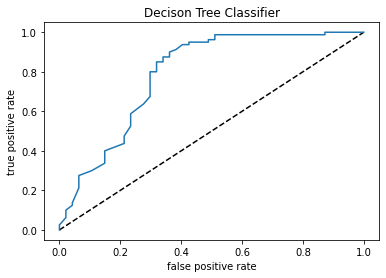

In [81]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifeir')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decison Tree Classifier')
plt.show()

In [82]:
auc_score=roc_auc_score(y_test,dt.predict(x_test))
print(auc_score)

0.6784574468085106


Auc_score of Decision Tree Classifier is 69%.

In [83]:
# GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7952755905511811
[[23 24]
 [ 2 78]]
              precision    recall  f1-score   support

           0       0.92      0.49      0.64        47
           1       0.76      0.97      0.86        80

    accuracy                           0.80       127
   macro avg       0.84      0.73      0.75       127
weighted avg       0.82      0.80      0.78       127



In [84]:
# For GaussianNB cross validation
scr=cross_val_score(gnb,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.812863568215892


Accuracy score is 79% and cv score is 81% for gaussianNB.

In [85]:
# AUC ROC CURVE GAUSSIANNB
gnb.fit(x_train,y_train)
y_pred_prob=gnb.predict_proba(x_test)[:,1]


In [86]:
y_pred_prob

array([1.37928969e-10, 7.10611377e-01, 9.57206837e-01, 5.18710072e-11,
       1.22469269e-10, 9.26760721e-01, 9.11610252e-01, 9.57917142e-01,
       9.71515988e-01, 8.95027003e-01, 9.50701275e-01, 9.68311233e-01,
       8.49432818e-01, 9.71501759e-01, 9.77831519e-01, 7.25555895e-01,
       9.69955353e-01, 9.33122644e-01, 8.60740365e-01, 6.05374553e-11,
       9.61050423e-01, 9.66136616e-01, 9.21608055e-01, 8.57954289e-01,
       8.90387028e-01, 9.58397178e-01, 9.42813061e-01, 9.64948723e-01,
       8.55903708e-01, 5.95693305e-01, 9.78395940e-11, 6.81600460e-11,
       1.41378224e-10, 8.21165293e-01, 1.04845357e-10, 2.65473044e-10,
       8.17600685e-01, 9.59736624e-01, 7.29055989e-11, 8.81376883e-01,
       9.66732685e-01, 9.57912028e-01, 9.48358630e-01, 8.87194893e-11,
       9.77541789e-01, 9.00075024e-01, 9.17893665e-01, 8.96146680e-01,
       9.72242500e-01, 9.04976151e-01, 9.31620961e-01, 9.54668472e-01,
       9.23628652e-01, 9.58977105e-01, 9.30851351e-01, 9.59010401e-01,
      

In [87]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.    , 0.0125, 0.0125, 0.05  , 0.05  , 0.1125, 0.1125, 0.1875,
       0.1875, 0.2125, 0.2125, 0.225 , 0.225 , 0.275 , 0.275 , 0.325 ,
       0.325 , 0.3375, 0.3375, 0.3625, 0.3625, 0.475 , 0.475 , 0.5875,
       0.5875, 0.6   , 0.6   , 0.6375, 0.6375, 0.7   , 0.7   , 0.7375,
       0.7375, 0.825 , 0.825 , 0.8625, 0.8625, 0.95  , 0.95  , 0.9875,
       0.9875, 1.    , 1.    ])

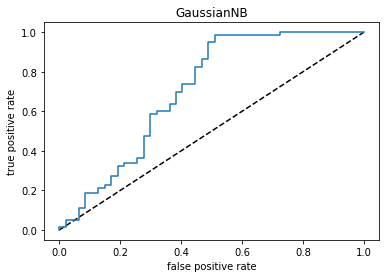

In [88]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('GaussianNB')
plt.show()

In [89]:
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
print(auc_score)

0.7321808510638298


Auc_score of GaussianNB is 73%.

In [90]:
# SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6299212598425197
[[ 0 47]
 [ 0 80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.63      1.00      0.77        80

    accuracy                           0.63       127
   macro avg       0.31      0.50      0.39       127
weighted avg       0.40      0.63      0.49       127



In [91]:
# SVC cross validation

scr=cross_val_score(svc,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.6897751124437781


Accuracy Score is 62% and cv score is 68%.

# HYPER PARAMETER TUNING OF MODEL

In [92]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier(max_depth=6,random_state=0)

grid_param={'criterion':['gini','entropy']}
           

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters =gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'criterion': 'entropy'}
0.8163568215892052


# FINAL MODEL

In [93]:

final_mod=RandomForestClassifier(criterion='entropy')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

77.95275590551181


After Hyper parameter tuning the accuracy score is 79.52%.

# SAVING THE MODEL

In [94]:
import pickle
filename='loan_status.pkl'
pickle.dump(rf, open(filename, 'wb'))

# CONCLUSION

Above predictions from the model , we can say that our model is performing extremly well, we are getting approx 80% accuracy .

With the help of MODEL , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on target columns..

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.